In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# plt.rcParams['figure.figsize'] = [12, 9]
import scipy.optimize as opt
import torch
import torch.nn as nn
import pickle

In [9]:
data = pickle.load(open('../data/quadratic_loss_resnet18_WNoneA2.pkl', 'rb'))
opt_point = data['opt']
points = np.array(data['points'])
loss = data['loss']

In [47]:
temp = points - opt_point.reshape(1, -1)
temp -= temp[0]
dist = np.sqrt(np.sum(temp**2, axis=1))
dist -= dist[np.argmin(loss)]

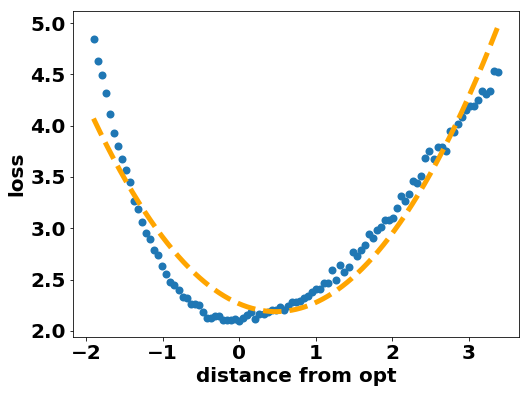

In [48]:
plt.rcParams['figure.figsize'] = [8, 6]
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

plt.scatter(dist, loss, linewidth=2);

plt.ylabel('loss', fontsize=20, weight='bold')
plt.xlabel('distance from opt', fontsize=20, weight='bold');

xp = np.linspace(np.min(dist), np.max(dist), 1000)
z = np.polyfit(dist, loss, 2)
y = np.poly1d(z)
plt.plot(xp, y(xp), '--', linewidth=5, c='orange');